This notebook shows how to generate the benchmark plots used in the paper. 

To generate the plots using the benchmarks of the original paper, download the following gist:

[stavros11/ffb88a5b914b60213515f0256c0e8aa4](https://gist.github.com/stavros11/ffb88a5b914b60213515f0256c0e8aa4)

copy the contents in a folder named `/data` in the directory of this notebook and execute all cells.

The logs provided in the gist serve as a template.
The same plotting functionality should work with logs generated from different machines.
To generate new logs from scratch one can use the bash scripts provided in the `scripts/` directory.

In [14]:
from utils import load_data

## Figure 2

Bar plot with import breakdown and dry run vs simulation comparison for qibojit.

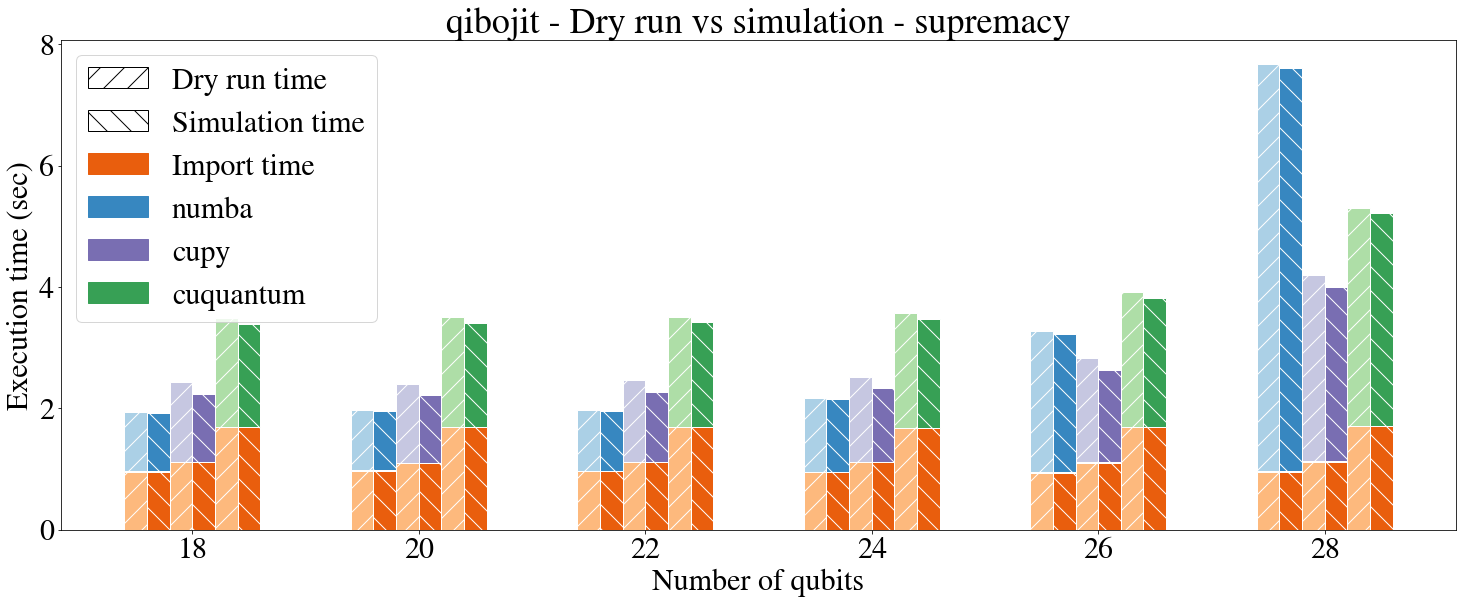

In [15]:
from barplots import plot_breakdown_nqubits

data = load_data(f"./data/qibojit_breakdown.dat")
plot_breakdown_nqubits(data, "supremacy")

## Figure 3

Scaling plots of execution time as a function of the number of qubits for all qibo backends.

In [ ]:
from scaling import plot_scaling

cpu_data = load_data("./data/qibo_scaling_cpu.dat")
gpu_data = load_data("./data/qibo_scaling_gpu.dat")

plot_scaling(cpu_data, gpu_data, "qft", "total_dry_time")
plot_scaling(cpu_data, gpu_data, "qft", "total_simulation_time")

## Figure 4

qibojit backend performance on different CPU and GPU devices.

In [ ]:
import seaborn as sns # used for color palettes
from hardware import plot_hardware

data = {
    "NVIDIA RTX A6000": load_data("./data/qibo_scaling_gpu.dat", qibojit_only=True),
    "NVIDIA DGX V100": load_data("./data/dgx_qibojit.dat", qibojit_only=True),
    "NVIDIA GTX 1650": load_data("./data/gtx1650_qibojit.dat", qibojit_only=True),
    "AMD Radeon VII": load_data("./data/rocm_qibojit.dat"),
    "AMD EPYC 7742": load_data("./data/qibo_scaling_cpu.dat", qibojit_only=True)
}
# filter qibojit-cupy only data if the log file contains more (eg. qibojit-cuquantum)
is_cupy = data["NVIDIA RTX A6000"]["library_options"].apply(lambda x: "cupy" in x)
data["NVIDIA RTX A6000"] = data["NVIDIA RTX A6000"][is_cupy == True]

# define colors an markers for each device
oranges = sns.color_palette("Oranges", 2)
greens = sns.color_palette("Greens", 2)
blues = sns.color_palette("Blues", 3)
colors = {
    "NVIDIA RTX A6000": blues[2],
    "NVIDIA DGX V100": blues[1],
    "NVIDIA GTX 1650": blues[0],
    "AMD Radeon VII": greens[1],
    "AMD EPYC 7742": oranges[1]
}
markers = {
    "NVIDIA RTX A6000": "o",
    "NVIDIA DGX V100": "^",
    "NVIDIA GTX 1650": "d",
    "AMD Radeon VII": "v",
    "AMD EPYC 7742": ""
}

plot_hardware(data, "qft", "total_dry_time", colors, markers, legend=False)
plot_hardware(data, "qft", "total_simulation_time", colors, markers, legend=True)

## Figure 5

Bar plot with different multigpu configurations and qibojit vs qibotf comparison.

In [ ]:
from barplots import plot_multigpu

data = load_data("./data/multigpu.dat")
plot_multigpu(data, 32, "total_dry_time")
plot_multigpu(data, 32, "total_simulation_time", legend=True)

## Figure 6

Bar plot with comparisons between different simulation libraries on various circuits.

In [ ]:
from libraries import plot_libraries_single, plot_libraries_double

cpu_data = load_data("./data/libraries_cpu.dat")
gpu_data = load_data("./data/libraries_gpu.dat")

plot_libraries_single(cpu_data, gpu_data, "total_dry_time", 20, legend=False)
plot_libraries_single(cpu_data, gpu_data, "total_dry_time", 30, legend=True)

plot_libraries_double(cpu_data, gpu_data, "total_dry_time", 20, legend=False)
plot_libraries_double(cpu_data, gpu_data, "total_dry_time", 30, legend=True)